In [ ]:
!pip install imgaug==0.2.6

In [ ]:
!pip install opencv-python --upgrade

In [4]:
# To use Google Drive Files
from google.colab import drive

drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


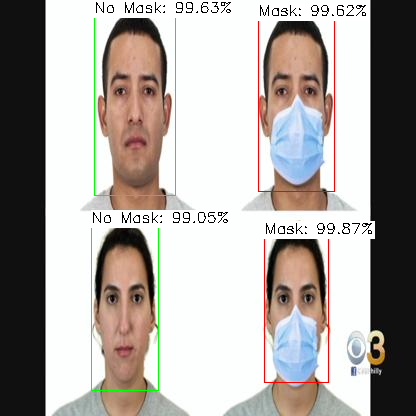

In [43]:
import cv2 
from google.colab.patches import cv2_imshow

net = cv2.dnn_DetectionModel('/mydrive/yolov4/yolov4-custom.cfg', '/mydrive/yolov4/yolov4-obj_best.weights')
net.setInputSize(416,416)
net.setInputScale(1.0/255)
net.setInputSwapRB(True)

CONFIDENCE_THRESHOLD = 0.2
NMS_THRESHOLD = 0.4
COLORS = [(0, 0, 255), (0, 255, 0)]

image = cv2.imread('/mydrive/yolov4/0001.jpg')
frame = cv2.resize(image, (416, 416), interpolation = cv2.INTER_AREA)

class_names = []
with open("/mydrive/yolov4/custom.names", "rt") as f:
  class_names = [cname.strip() for cname in f.readlines()]

classes, scores, boxes = net.detect(frame, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)
for (classid, score, box) in zip(classes.flatten(), scores.flatten(), boxes):
  color = COLORS[int(classid) % len(COLORS)]
  label = "Mask" if class_names[classid] == "mask" else "No Mask"
  label = "{}: {:.2f}%".format(label, score * 100)
  labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
  left, top, width, height = box
  top = max(top, labelSize[1])
  cv2.rectangle(frame, box, color, thickness=1)
  cv2.rectangle(frame, (left, top - labelSize[1]), (left + labelSize[0], top + baseLine), (255, 255, 255), cv2.FILLED)
  cv2.putText(frame, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1)

cv2_imshow(frame)